# Importando e Instalando Bibliotecas



In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa
import glob
import chardet

In [ ]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Configurando Pandas

In [ ]:
pd.set_option('display.max_columns',20)

#Conector com Google Cloud

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)

serviceAccount = '/content/projeto-final-384719-f1efca397470.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('projeto_final_crimes')

In [ ]:
#ROUBOS
path_roubos_2023 = 'gs://projeto_final_crimes/brutos_roubos/roubos_2023.csv'
path_roubos_2022 = 'gs://projeto_final_crimes/brutos_roubos/roubos_2022.csv'
path_roubos_2021 = 'gs://projeto_final_crimes/brutos_roubos/roubos_2021.csv'
path_roubos_2020 = 'gs://projeto_final_crimes/brutos_roubos/roubos_2020.csv'
path_roubos_2019 = 'gs://projeto_final_crimes/brutos_roubos/roubos_2019.csv'
path_roubos_2018 = 'gs://projeto_final_crimes/brutos_roubos/roubos_2018.csv'

In [ ]:
#FURTOS
path_furtos_2023 = 'gs://projeto_final_crimes/brutos_furtos/furtos_2023.csv'
path_furtos_2022 = 'gs://projeto_final_crimes/brutos_furtos/furtos_2022.csv'
path_furtos_2021 = 'gs://projeto_final_crimes/brutos_furtos/furtos_2021.csv'
path_furtos_2020 = 'gs://projeto_final_crimes/brutos_furtos/furtos_2020.csv'
path_furtos_2019 = 'gs://projeto_final_crimes/brutos_furtos/furtos_2019.csv'
path_furtos_2018 = 'gs://projeto_final_crimes/brutos_furtos/furtos_2018.csv'

#Concatenando os dataframes

In [ ]:
# #ROUBOS

df_roubos_2023 = pd.read_csv(path_roubos_2023,sep=',',encoding='utf-8')
df_roubos_2022 = pd.read_csv(path_roubos_2022,sep=',',encoding='utf-8')
df_roubos_2021 = pd.read_csv(path_roubos_2021,sep=',',encoding='utf-8')
df_roubos_2020 = pd.read_csv(path_roubos_2020,sep=',',encoding='utf-8')
df_roubos_2019 = pd.read_csv(path_roubos_2019,sep=',',encoding='utf-8')
df_roubos_2018 = pd.read_csv(path_roubos_2018,sep=',',encoding='utf-8')

<ipython-input-124-13e9e0aa568b>:4: DtypeWarning: Columns (21,29,30,31,32,33,34,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_roubos_2022 = pd.read_csv(path_roubos_2022,sep=',',encoding='utf-8')
<ipython-input-124-13e9e0aa568b>:6: DtypeWarning: Columns (32,36,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_roubos_2020 = pd.read_csv(path_roubos_2020,sep=',',encoding='utf-8')
<ipython-input-124-13e9e0aa568b>:7: DtypeWarning: Columns (31,32,34,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_roubos_2019 = pd.read_csv(path_roubos_2019,sep=',',encoding='utf-8')


In [ ]:
#FURTOS

df_furtos_2023 = pd.read_csv(path_furtos_2023,sep=',',encoding='utf-8')
df_furtos_2022 = pd.read_csv(path_furtos_2022,sep=',',encoding='utf-8')
df_furtos_2021 = pd.read_csv(path_furtos_2021,sep=',',encoding='utf-8')
df_furtos_2020 = pd.read_csv(path_furtos_2020,sep=',',encoding='utf-8')
df_furtos_2019 = pd.read_csv(path_furtos_2019,sep=',',encoding='utf-8')
df_furtos_2018 = pd.read_csv(path_furtos_2018,sep=',',encoding='utf-8')

<ipython-input-125-31fe70169f70>:4: DtypeWarning: Columns (21,27,31,32,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_furtos_2022 = pd.read_csv(path_furtos_2022,sep=',',encoding='utf-8')
<ipython-input-125-31fe70169f70>:5: DtypeWarning: Columns (29,30,31,33,34,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_furtos_2021 = pd.read_csv(path_furtos_2021,sep=',',encoding='utf-8')
<ipython-input-125-31fe70169f70>:6: DtypeWarning: Columns (29,30,31,32,33,34,36,37,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_furtos_2020 = pd.read_csv(path_furtos_2020,sep=',',encoding='utf-8')
<ipython-input-125-31fe70169f70>:7: DtypeWarning: Columns (31,32,34,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_furtos_2019 = pd.read_csv(path_furtos_2019,sep=',',encoding='utf-8')
<ipython-input-125-31fe70169f70>:8: DtypeWarning: Columns (29,30,3

In [ ]:
df_furtos = pd.concat([df_furtos_2023,df_furtos_2022,df_furtos_2021,df_furtos_2020,df_furtos_2019,df_furtos_2018], axis=0).reset_index(drop=True)

In [ ]:
df_roubos = pd.concat([df_roubos_2023,df_roubos_2022,df_roubos_2021,df_roubos_2020,df_roubos_2019,df_roubos_2018], axis=0).reset_index(drop=True)

#Tratamento Roubos

##Dropando colunas

In [ ]:
df_roubos.dtypes

ANO_BO                        int64
NUM_BO                        int64
NUMERO_BOLETIM               object
BO_INICIADO                  object
BO_EMITIDO                   object
DATAOCORRENCIA               object
HORAOCORRENCIA               object
PERIDOOCORRENCIA             object
DATACOMUNICACAO              object
DATAELABORACAO               object
BO_AUTORIA                   object
FLAGRANTE                    object
NUMERO_BOLETIM_PRINCIPAL     object
LOGRADOURO                   object
NUMERO                      float64
BAIRRO                       object
CIDADE                       object
UF                           object
LATITUDE                     object
LONGITUDE                    object
DESCRICAOLOCAL               object
EXAME                        object
SOLUCAO                      object
DELEGACIA_NOME               object
DELEGACIA_CIRCUNSCRICAO      object
ESPECIE                      object
RUBRICA                      object
DESDOBRAMENTO               

In [ ]:
df_roubos['Unnamed: 55'].tail(5)

236787    NaN
236788    NaN
236789    NaN
236790    NaN
236791    NaN
Name: Unnamed: 55, dtype: object

In [ ]:
df_roubos.head(10)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,Unnamed: 54,Unnamed: 55
0,2023,8696,8696/2023,01/01/2023 01:23:54,01/01/2023 01:23:58,31/12/2022,22:20,A NOITE,31/12/2022,01/01/2023 01:23:54,...,FXZ3H05,SP,S.PAULO,Preta,HONDA/FIT EXL CVT,2021,NaN,AUTOMOVEL,NaN,NaN
1,2023,70,70/2023,01/01/2023 01:31:03,01/01/2023 01:31:03,31/12/2022,15:54,A TARDE,31/12/2022,01/01/2023 01:31:03,...,FKV8033,SP,S.PAULO,Preta,I/HONDA CR-V EXL FLEX4WD,2013,2013.0,CAMIONETA,NaN,NaN
2,2023,34,34/2023,01/01/2023 02:41:56,01/01/2023 02:41:56,31/12/2022,23:50,A NOITE,01/01/2023,01/01/2023 02:41:56,...,FEY4426,SP,S.PAULO,Verde,FIAT/DOBLO ADV 1.8 FLEX,2012,2013.0,AUTOMOVEL,NaN,NaN
3,2023,3,3/2023,01/01/2023 02:57:28,01/01/2023 02:57:28,01/11/2022,22:50,A NOITE,02/11/2022,01/01/2023 02:57:28,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
4,2023,3,3/2023,01/01/2023 02:57:28,01/01/2023 02:57:28,01/11/2022,22:50,A NOITE,02/11/2022,01/01/2023 02:57:28,...,QJW6D05,SP,EMBU DAS ARTES,Preta,KAWASAKI/VERSYS-X 300 A,2019,2020.0,MOTOCICLO,NaN,NaN
5,2023,3,3/2023,01/01/2023 02:57:28,01/01/2023 02:57:28,01/11/2022,22:50,A NOITE,02/11/2022,01/01/2023 02:57:28,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
6,2023,3,3/2023,01/01/2023 02:57:28,01/01/2023 02:57:28,01/11/2022,22:50,A NOITE,02/11/2022,01/01/2023 02:57:28,...,QJW6D05,SP,EMBU DAS ARTES,Preta,KAWASAKI/VERSYS-X 300 A,2019,2020.0,MOTOCICLO,NaN,NaN
7,2023,8697,8697/2023,01/01/2023 03:30:10,01/01/2023 03:30:10,31/12/2022,22:20,A NOITE,31/12/2022,01/01/2023 03:30:10,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
8,2023,8697,8697/2023,01/01/2023 03:30:10,01/01/2023 03:30:10,31/12/2022,22:20,A NOITE,31/12/2022,01/01/2023 03:30:10,...,FXZ3H05,SP,S.PAULO,Preta,HONDA/FIT EXL CVT,2021,NaN,AUTOMOVEL,NaN,NaN
9,2023,8697,8697/2023,01/01/2023 03:30:10,01/01/2023 03:30:10,31/12/2022,22:20,A NOITE,31/12/2022,01/01/2023 03:30:10,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN


In [ ]:
df_roubos.tail(10)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,Unnamed: 54,Unnamed: 55
236782,2018,4914,4914/2018,31/12/2018 22:29,31/12/2018 22:56,31/12/2018,14:00,A TARDE,31/12/2018,31/12/2018 22:29,...,SAO PAULO,Cinza,CHEVROLET/COBALT 1.8 LTZ,2015.0,2016.0,AUTOMOVEL,NaN,NaN,NaN,NaN
236783,2018,11065,11065/2018,31/12/2018 23:02,31/12/2018 23:16,31/12/2018,21:20,A NOITE,31/12/2018,31/12/2018 23:02,...,SAO PAULO,Vermelho,FIAT/ARGO DRIVE 1.3,2018.0,2018.0,AUTOMOVEL,NaN,NaN,NaN,NaN
236784,2018,1650501,1650501/2018,31/12/2018 23:40,31/12/2018 23:40,30/12/2018,15:40,A TARDE,31/12/2018,31/12/2018 23:40,...,NaN,Preta,H/HONDA CG 125,NaN,NaN,MOTOCICLO,NaN,NaN,NaN,NaN
236785,2018,1650501,1650501/2018,31/12/2018 23:40,31/12/2018 23:40,30/12/2018,15:40,A TARDE,31/12/2018,31/12/2018 23:40,...,FRANCISCO MORATO,Branco,NaN,2018.0,NaN,MOTOCICLO,NaN,NaN,NaN,NaN
236786,2018,1650508,1650508/2018,31/12/2018 23:45,31/12/2018 23:45,31/12/2018,17:40,A TARDE,31/12/2018,31/12/2018 23:45,...,SÃO PAULO,Prata,I/PEUGEOT 207HB XR,2011.0,NaN,AUTOMOVEL,NaN,NaN,NaN,NaN
236787,2018,13194,13194/2018,31/12/2018 23:41,31/12/2018 23:49,31/12/2018,23:30,A NOITE,31/12/2018,31/12/2018 23:41,...,SAO PAULO,Preta,YAMAHA/FAZER YS250,2006.0,2006.0,MOTOCICLO,NaN,NaN,NaN,NaN
236788,2018,1650499,1650499/2018,31/12/2018 23:50,31/12/2018 23:50,31/12/2018,21:40,A NOITE,31/12/2018,31/12/2018 23:50,...,NaN,Azul,NaN,NaN,NaN,MOTOCICLO,NaN,NaN,NaN,NaN
236789,2018,1650499,1650499/2018,31/12/2018 23:50,31/12/2018 23:50,31/12/2018,21:40,A NOITE,31/12/2018,31/12/2018 23:50,...,SÃO PAULO,Prata,JEEP/RENEGADE SPORT MT,2017.0,NaN,AUTOMOVEL,NaN,NaN,NaN,NaN
236790,2018,9327,9327/2018,31/12/2018 23:30,31/12/2018 23:51,31/12/2018,22:00,A NOITE,31/12/2018,31/12/2018 23:30,...,SAO PAULO,Prata,I/FORD FIESTA SE,2011.0,2012.0,AUTOMOVEL,NaN,NaN,NaN,NaN
236791,2018,5766,5766/2018,31/12/2018 23:36,31/12/2018 23:59,31/12/2018,23:30,A NOITE,31/12/2018,31/12/2018 23:36,...,SAO PAULO,Cinza,HONDA/CG 150 TITAN KS,2008.0,2008.0,MOTOCICLO,NaN,NaN,NaN,NaN


In [ ]:
df_roubos.loc[df_roubos.ANO_BO==2022]

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,Unnamed: 54,Unnamed: 55
9219,2022,1,jan/22,01/01/2022 00:04,01/01/2022 00:30,31/12/2021,22:30,A NOITE,01/01/2022,01/01/2022 00:04,...,S.PAULO,Preta,I/PEUGEOT 307 16 PR PK,2007.0,2008.0,AUTOMOVEL,NaN,NaN,NaN,NaN
9221,2022,2,fev/22,01/01/2022 00:41,01/01/2022 00:41,31/12/2021,21:50,A NOITE,01/01/2022,01/01/2022 00:41,...,FERRAZ DE VASCONCELO,Prata,I/HYUNDAI TUCSON GL 20L,2007.0,NaN,AUTOMOVEL,NaN,NaN,NaN,NaN
9222,2022,2,fev/22,01/01/2022 00:55,01/01/2022 00:55,31/12/2021,23:30,A NOITE,01/01/2022,01/01/2022 00:55,...,S.PAULO,Vermelho,FIAT/PALIO ELX,2001.0,2001.0,AUTOMOVEL,NaN,NaN,NaN,NaN
9223,2022,1,jan/22,01/01/2022 01:02,01/01/2022 01:42,31/12/2021,23:00,A NOITE,01/01/2022,01/01/2022 01:02,...,S.PAULO,Cinza,NISSAN/KICKS ACTIVE CVT,2021.0,2022.0,AUTOMOVEL,NaN,NaN,NaN,NaN
9224,2022,84,84/2022,01/01/2022 02:05,01/01/2022 02:25,01/01/2022,00:30,DE MADRUGADA,01/01/2022,01/01/2022 02:05,...,SÃO PAULO,Preta,HONDA/CG 160 FAN,2019.0,NaN,MOTOCICLO,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58716,2022,9684,9684/2022,29/12/2022 23:12,29/12/2022 23:12,29/12/2022,21:30,A NOITE,29/12/2022,29/12/2022 23:12,...,BELO HORIZONTE,Branco,FIAT/UNO ATTRACTIVE 1.0,2021.0,2021.0,AUTOMOVEL,NaN,NaN,NaN,NaN
58717,2022,4647,4647/2022,29/12/2022 23:18,29/12/2022 23:18,15/12/2022,00:10,DE MADRUGADA,15/12/2022,29/12/2022 23:18,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
58718,2022,4647,4647/2022,29/12/2022 23:18,29/12/2022 23:18,15/12/2022,00:10,DE MADRUGADA,15/12/2022,29/12/2022 23:18,...,S.PAULO,Prata,FIAT/DOBLO ESSENCE 7L E,2017.0,2017.0,AUTOMOVEL,NaN,NaN,NaN,NaN
58719,2022,4647,4647/2022,29/12/2022 23:18,29/12/2022 23:18,15/12/2022,00:10,DE MADRUGADA,15/12/2022,29/12/2022 23:18,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Analisando os dados do ano de 2023, percebemos muitas inconsistências, como colunas trocadas e duas colunas a mais vazias, além do fato de ter somente dois meses disponíveis para análise, portanto, decidimos dropar o ano 2023.

In [ ]:
df_roubos = pd.concat([df_roubos_2022,df_roubos_2021,df_roubos_2020,df_roubos_2019,df_roubos_2018], axis=0).reset_index(drop=True)
df_furtos = pd.concat([df_furtos_2022,df_furtos_2021,df_furtos_2020,df_furtos_2019,df_furtos_2018], axis=0).reset_index(drop=True)

As colunas NUM_BO, NUMERO_BOLETIM, BO_INICIADO, BO_EMITIDO, DATACOMUNICACAO,DATAELABORACAO, BO_AUTORIA, NUMERO_BOLETIM_PRINCIPAL, EXAME, SOLUCAO,PLACA_VEICULO, DELEGACIA_NOME, DELEGACIA_CIRCUNSCRICAO, ESPECIE, RUBRICA,DESDOBRAMENTO, TIPOPESSOA, VITIMAFATAL, NATURALIDADE, NACIONALIDADE, SEXO,IDADE,DATANASCIMENTO, IDADE, ESTADOCIVIL, PROFISSAO, GRAUINSTRUCAO, CORCUTIS,
NATUREZAVINCULADA, TIPOVINCULO, RELACIONAMENTO, PARENTESCO, PLACAVEICULO, QUANT_CELULAR, MARCA_CELULAR ou por estarem vazios ou porque não serão úteis para análise proposta.

In [ ]:
df_roubos.drop(['NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO', 'DATACOMUNICACAO',
                'DATAELABORACAO', 'BO_AUTORIA', 'NUMERO_BOLETIM_PRINCIPAL', 'EXAME',
                'SOLUCAO', 'PLACA_VEICULO','DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO',
                'ESPECIE', 'RUBRICA', 'DESDOBRAMENTO', 'TIPOPESSOA',
                'VITIMAFATAL', 'NATURALIDADE', 'NACIONALIDADE', 'SEXO',
                'IDADE','DATANASCIMENTO','ESTADOCIVIL','PROFISSAO',
                'GRAUINSTRUCAO','CORCUTIS','NATUREZAVINCULADA','TIPOVINCULO',
                'RELACIONAMENTO','PARENTESCO','PLACA_VEICULO', 'QUANT_CELULAR',
                'MARCA_CELULAR'],axis=1,inplace=True)

In [ ]:
# Colunas restante após o Drop
df_roubos.dtypes

ANO_BO                   int64
DATAOCORRENCIA          object
HORAOCORRENCIA          object
PERIDOOCORRENCIA        object
FLAGRANTE               object
LOGRADOURO              object
NUMERO                 float64
BAIRRO                  object
CIDADE                  object
UF                      object
LATITUDE                object
LONGITUDE               object
DESCRICAOLOCAL          object
STATUS                  object
UF_VEICULO              object
CIDADE_VEICULO          object
DESCR_COR_VEICULO       object
DESCR_MARCA_VEICULO     object
ANO_FABRICACAO         float64
ANO_MODELO             float64
DESCR_TIPO_VEICULO      object
dtype: object

In [ ]:
df_roubos.isna().sum()

ANO_BO                     0
DATAOCORRENCIA             0
HORAOCORRENCIA          5843
PERIDOOCORRENCIA           0
FLAGRANTE                  0
LOGRADOURO             10194
NUMERO                    91
BAIRRO                  1616
CIDADE                    91
UF                        91
LATITUDE               15575
LONGITUDE              15575
DESCRICAOLOCAL             0
STATUS                     0
UF_VEICULO             66575
CIDADE_VEICULO         67598
DESCR_COR_VEICULO      63015
DESCR_MARCA_VEICULO    67677
ANO_FABRICACAO          7632
ANO_MODELO             33276
DESCR_TIPO_VEICULO     63115
dtype: int64

In [ ]:
df_roubos.shape

(227573, 21)

A coluna com mais valores nulos é DESCR_MARCA_VEICULO, que tem 29,74% de valores nulos. Como não passou de 30%, optamos por não dropar os valores nulos.

##Conversão de formatos

In [ ]:
df_roubos.dtypes

ANO_BO                   int64
DATAOCORRENCIA          object
HORAOCORRENCIA          object
PERIDOOCORRENCIA        object
FLAGRANTE               object
LOGRADOURO              object
NUMERO                 float64
BAIRRO                  object
CIDADE                  object
UF                      object
LATITUDE                object
LONGITUDE               object
DESCRICAOLOCAL          object
STATUS                  object
UF_VEICULO              object
CIDADE_VEICULO          object
DESCR_COR_VEICULO       object
DESCR_MARCA_VEICULO     object
ANO_FABRICACAO         float64
ANO_MODELO             float64
DESCR_TIPO_VEICULO      object
dtype: object

In [ ]:
df_roubos['DATAOCORRENCIA'].isna().sum()

0

In [ ]:
for data in df_roubos['DATAOCORRENCIA']:
    try:
        pd.to_datetime(data, format='%d/%m/%Y')
    except Exception as e:
        print(f"Erro ao converter {data}: {e}")

Erro ao converter 17/12/0202: Out of bounds nanosecond timestamp: 202-12-17 00:00:00
Erro ao converter 23/01/1019: Out of bounds nanosecond timestamp: 1019-01-23 00:00:00
Erro ao converter 02/03/1019: Out of bounds nanosecond timestamp: 1019-03-02 00:00:00


In [ ]:
df_roubos.DATAOCORRENCIA.replace(to_replace ="17/12/0202",value = '17/12/2020', regex=True,inplace=True)
df_roubos.DATAOCORRENCIA.replace(to_replace ="23/01/1019",value = '23/01/2019', regex=True,inplace=True)
df_roubos.DATAOCORRENCIA.replace(to_replace ="02/03/1019",value = '02/03/2019', regex=True,inplace=True)

In [ ]:
df_roubos['DATAOCORRENCIA'] = pd.to_datetime(df_roubos['DATAOCORRENCIA'], format='%d/%m/%Y')


In [ ]:
for data in df_roubos['HORAOCORRENCIA']:
    try:
        pd.to_datetime(data, format='%H:%M')
    except Exception as e:
        print(f"Erro ao converter {data}: {e}")

In [ ]:
df_roubos['HORAOCORRENCIA']= pd.to_datetime(df_roubos['HORAOCORRENCIA'],format='%H:%M')

In [ ]:
df_roubos['NUMERO'] = df_roubos['NUMERO'].astype(str)

In [ ]:
df_roubos['ANO_FABRICACAO']=df_roubos.ANO_FABRICACAO.round().astype('Int64')

In [ ]:
df_roubos['ANO_MODELO']=df_roubos.ANO_MODELO.round().astype('Int64')

In [ ]:
df_roubos.dtypes

ANO_BO                          int64
DATAOCORRENCIA         datetime64[ns]
HORAOCORRENCIA         datetime64[ns]
PERIDOOCORRENCIA               object
FLAGRANTE                      object
LOGRADOURO                     object
NUMERO                         object
BAIRRO                         object
CIDADE                         object
UF                             object
LATITUDE                       object
LONGITUDE                      object
DESCRICAOLOCAL                 object
STATUS                         object
UF_VEICULO                     object
CIDADE_VEICULO                 object
DESCR_COR_VEICULO              object
DESCR_MARCA_VEICULO            object
ANO_FABRICACAO                  Int64
ANO_MODELO                      Int64
DESCR_TIPO_VEICULO             object
dtype: object

## Visualizações e Insights Roubos

In [ ]:
df_roubos.columns

Index(['ANO_BO', 'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'FLAGRANTE', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE', 'UF',
       'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'STATUS', 'UF_VEICULO',
       'CIDADE_VEICULO', 'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO',
       'ANO_FABRICACAO', 'ANO_MODELO', 'DESCR_TIPO_VEICULO'],
      dtype='object')

In [ ]:
df_roubos.groupby(['BAIRRO']).size().sort_values(ascending=False).head(10)

BAIRRO
JABAQUARA         8609
SACOMA            6876
SAO MATEUS        6180
SAPOPEMBA         5552
SAO RAFAEL        5504
IGUATEMI          5486
ITAQUERA          4778
IPIRANGA          4744
CIDADE ADEMAR     4489
ITAIM PAULISTA    4370
dtype: int64

In [ ]:
df_roubos.groupby(['ANO_BO']).size().sort_values(ascending=False)

ANO_BO
2018    63065
2019    51097
2022    49497
2020    34400
2021    29191
2023      323
dtype: int64

<Axes: xlabel='ANO_BO', ylabel='N. Ocorrencias'>

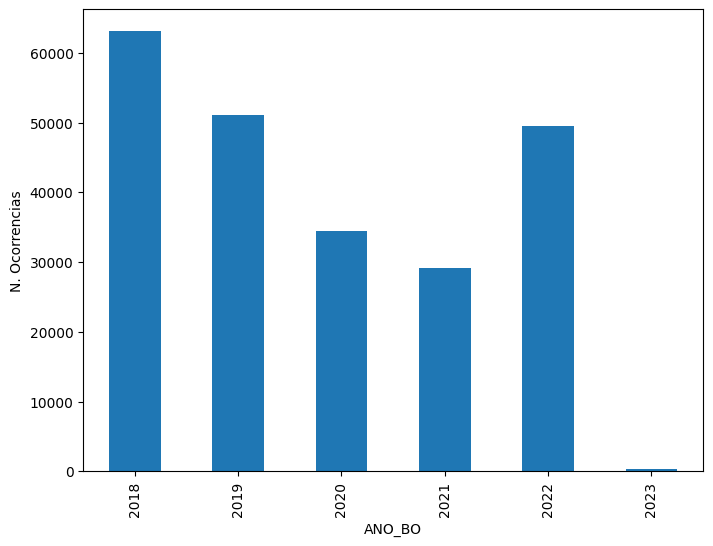

In [ ]:
df_roubos.groupby(['ANO_BO']).size().plot.bar(figsize=(8,6),xlabel='ANO_BO',ylabel='N. Ocorrencias')

<Axes: >

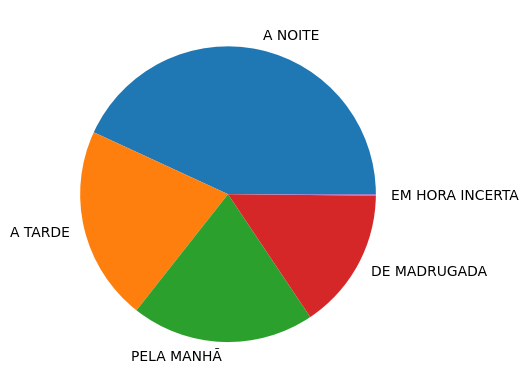

In [ ]:
df_roubos.groupby('PERIDOOCORRENCIA',dropna=False).size().sort_values(ascending=False).plot.pie()

In [ ]:
df_roubos.groupby(['DESCR_COR_VEICULO']).size().sort_values(ascending=False)

DESCR_COR_VEICULO
Branco           41590
Preta            36981
Prata            30124
Vermelho         18782
Cinza            18052
Azul              8993
Verde             2604
Amarelo           2368
Não Informado     1571
Marrom            1141
Laranja            864
Bege               729
Roxa               296
Fantasia           215
Dourada            215
Grena               20
Rosa                13
dtype: int64

<Axes: >

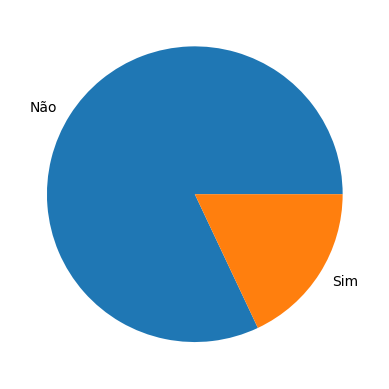

In [ ]:
df_roubos.groupby('FLAGRANTE',dropna=False).size().sort_values(ascending=False).plot.pie()

In [ ]:
df_roubos.shape

(227573, 21)

Vamos arrumar e Unificar o valor "Via Pública" com "Via pública"

In [ ]:
df_roubos.DESCRICAOLOCAL.replace(to_replace ="Via Pública",value = 'Via pública', regex=True,inplace=True)


In [ ]:
df_roubos.groupby(['DESCRICAOLOCAL']).size().sort_values(ascending=False)

DESCRICAOLOCAL
Via pública                        205221
Residência                           6549
Comércio e serviços                  3503
Outros                               2868
Veículo em movimento                 2824
Garagem ou abrigo de residência      1468
Rodovia/Estrada                      1211
Centro Comerc./Empresarial            588
Area não ocupada                      469
Restaurante e afins                   433
Estacionamento particular             331
Condominio Residencial                318
Repartição Pública                    264
Estabelecimento de ensino             200
Estacionamento público                183
Saúde                                 158
Favela                                131
Terminal/Estação                      119
Shopping Center                       106
Estabelecimento bancário              105
Garagem coletiva de prédio             82
Escritório                             70
Estacionamento com vigilância          67
Local clandestino/i

<Axes: >

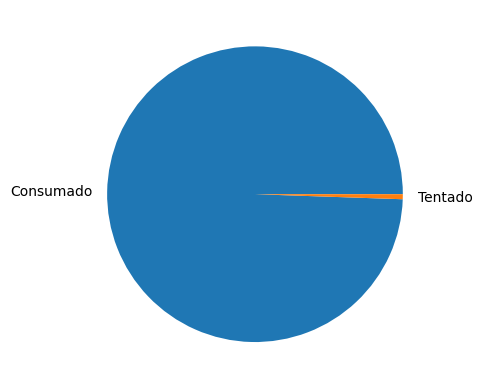

In [ ]:
df_roubos.groupby('STATUS',dropna=False).size().sort_values(ascending=False).plot.pie()

In [ ]:
df_roubos.groupby(['UF_VEICULO']).size().sort_values(ascending=False)

UF_VEICULO
SP    148142
MG      7472
PR      1392
SC       970
RJ       475
RS       434
BA       320
ES       226
GO       217
MT       211
MS       188
PB       153
CE       152
PE       134
AL        94
PA        76
DF        50
MA        50
RN        50
SE        42
TO        40
PI        33
RO        29
AM        18
AC        13
OP        12
RR         3
AP         2
dtype: int64

In [ ]:
df_roubos.groupby(['DESCR_MARCA_VEICULO']).size().sort_values(ascending=False)

DESCR_MARCA_VEICULO
HONDA/CG 160 FAN            2417
HONDA/XRE 300               1875
HYUNDAI/HB20 1.0M COMFOR    1577
CHEVROLET/ONIX 1.0MT LT     1473
HONDA/CB 300R               1438
                            ... 
RENAULT/MASTER TVAN            1
RENAULT/MASTER NIKSMC.CH       1
RENAULT/MASTER NIKS MO20       1
I/AUDI Q5 SPB 2.0TFSI          1
I/PEUGEOT 107 1.0BVM 5PN       1
Length: 5598, dtype: int64

###Criando coluna com modelo do carro

In [ ]:
#Filtro para letras dentro do valor
filtrointerno = df_roubos.DESCR_MARCA_VEICULO.fillna('').str.contains('HONDA/CG150')
df_roubos.loc[filtrointerno].groupby(['DESCR_MARCA_VEICULO']).size().sort_values(ascending=False)

DESCR_MARCA_VEICULO
HONDA/CG150 FAN ESDI        768
HONDA/CG150 START           104
HONDA/CG150 TITAN MIX KS    100
HONDA/CG150 CARGO ESD        87
HONDA/CG150FANCARGO ESDI     64
HONDA/CG150 TITAN MIX EX     63
HONDA/CG150 TITAN MIX ES     47
HONDA/CG150 TITAN MIXESD     32
HONDA/CG150 SPECIAL EDIT      1
dtype: int64

In [ ]:
df_roubos['modelo'] = df_roubos['DESCR_MARCA_VEICULO'].str.split(' ', n=2, expand=True)[0] + ' ' + df_roubos['DESCR_MARCA_VEICULO'].str.split(' ', n=2, expand=True)[1]
df_roubos['modelo'].head(5)

0          I/PEUGEOT 307
1             FORD/KA SE
2       I/HYUNDAI TUCSON
3         FIAT/PALIO ELX
4    NISSAN/KICKS ACTIVE
Name: modelo, dtype: object

In [ ]:
df_roubos['modelo'] = np.where(df_roubos['modelo'].str.startswith('I/'),df_roubos['modelo'],df_roubos['modelo'].str.split(' ', n=2, expand=True)[0])
df_roubos['modelo'] = df_roubos['modelo'].fillna(df_roubos['DESCR_MARCA_VEICULO'])
df_roubos['modelo'].head(5)

0       I/PEUGEOT 307
1             FORD/KA
2    I/HYUNDAI TUCSON
3          FIAT/PALIO
4        NISSAN/KICKS
Name: modelo, dtype: object

In [ ]:
df_roubos.groupby(['modelo']).size().sort_values(ascending=False).head(20)

modelo
HONDA/CG           10823
CHEVROLET/ONIX      4122
FORD/KA             3603
HYUNDAI/HB20        3380
HONDA/FIT           3341
HONDA/CB            2898
RENAULT/SANDERO     2786
HONDA/XRE           2752
FIAT/PALIO          2695
FIAT/FIORINO        2488
FIAT/UNO            2377
FORD/FIESTA         2276
CHEV/PRISMA         2108
VW/FOX              2106
TOYOTA/COROLLA      2056
HONDA/PCX           1973
RENAULT/LOGAN       1914
HONDA/CIVIC         1798
JEEP/RENEGADE       1701
YAMAHA/XTZ250       1659
dtype: int64

Por praticidade, decidimos trabalhar com os 20 modelos mais roubados/furtados, porque para tratar as inconsistências vindas do banco de dados, exigiria muito mais tempo dedicado ao tratamento de dados

In [ ]:
top_20 = df_roubos.groupby(['modelo']).size().sort_values(ascending=False).head(20)
lista_top_20 = top_20.index.tolist()
lista_top_20

['HONDA/CG',
 'CHEVROLET/ONIX',
 'FORD/KA',
 'HYUNDAI/HB20',
 'HONDA/FIT',
 'HONDA/CB',
 'RENAULT/SANDERO',
 'HONDA/XRE',
 'FIAT/PALIO',
 'FIAT/FIORINO',
 'FIAT/UNO',
 'FORD/FIESTA',
 'CHEV/PRISMA',
 'VW/FOX',
 'TOYOTA/COROLLA',
 'HONDA/PCX',
 'RENAULT/LOGAN',
 'HONDA/CIVIC',
 'JEEP/RENEGADE',
 'YAMAHA/XTZ250']

In [ ]:
for valor in lista_top_20:
    filtrointerno = df_roubos.modelo.fillna('').str.contains(valor)
    df_roubos.loc[filtrointerno, 'modelo'] = df_roubos.loc[filtrointerno, 'modelo'].str.replace(rf'{valor}.*', valor)

<ipython-input-168-5d0019fd9996>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_roubos.loc[filtrointerno, 'modelo'] = df_roubos.loc[filtrointerno, 'modelo'].str.replace(rf'{valor}.*', valor)


In [ ]:
df_roubos.groupby(['modelo']).size().sort_values(ascending=False).head(20)

modelo
HONDA/CG           12121
HONDA/CB            5011
HYUNDAI/HB20        4863
CHEVROLET/ONIX      4122
FORD/KA             3603
HONDA/FIT           3341
RENAULT/SANDERO     2786
HONDA/XRE           2752
FIAT/PALIO          2695
FIAT/FIORINO        2488
FIAT/UNO            2377
FORD/FIESTA         2276
CHEV/PRISMA         2108
VW/FOX              2106
TOYOTA/COROLLA      2056
HONDA/PCX           1973
RENAULT/LOGAN       1914
HONDA/CIVIC         1798
JEEP/RENEGADE       1701
YAMAHA/XTZ250       1663
dtype: int64

In [ ]:
# Consultas pra ver inconsistências restantes
filtrointerno = df_roubos.modelo.fillna('').str.contains('XTZ250')
df_roubos.loc[filtrointerno].groupby(['modelo']).size().sort_values(ascending=False)

modelo
YAMAHA/XTZ250    1663
dtype: int64

In [ ]:
#Corrigindo inconsistência do ONIX
df_roubos.modelo.replace(to_replace ="CHEV/ONIX",value = 'CHEVROLET/ONIX', regex=True,inplace=True)

In [ ]:
#Juntando I/HONDA FIT com HONDA/FIT
df_roubos.modelo.replace(to_replace ="I/HONDA FIT",value = 'HONDA/FIT', regex=True,inplace=True)

In [ ]:
#Juntando I/RENAULT SANDERO COM RENAULT/SANDERO
df_roubos.modelo.replace(to_replace ="I/RENAULT SANDERO",value = 'RENAULT/SANDERO', regex=True,inplace=True)

In [ ]:
# Fiat Palio/ Fiorino
df_roubos.modelo.replace(to_replace ="I/FIAT PALIO",value = 'FIAT/PALIO', regex=True,inplace=True)
df_roubos.modelo.replace(to_replace ="I/FIAT FIORINO",value = 'FIAT/FIORINO', regex=True,inplace=True)

In [ ]:
# CHEVROLET PRISMA
df_roubos.modelo.replace(to_replace ="CHEV/PRISMA",value = 'CHEVROLET/PRISMA', regex=True,inplace=True)
df_roubos.modelo.replace(to_replace ="GM/PRISMA",value = 'CHEVROLET/PRISMA', regex=True,inplace=True)

In [ ]:
# VW/FOX
df_roubos.modelo.replace(to_replace ="I/VW FOX",value = 'VW/FOX', regex=True,inplace=True)

In [ ]:
# COROLLA
df_roubos.modelo.replace(to_replace ="I/TOYOTA COROLLA",value = 'TOYOTA/COROLLA', regex=True,inplace=True)

In [ ]:
#FIESTA
df_roubos.modelo.replace(to_replace ="I/FORD FIESTA",value = 'FORD/FIESTA', regex=True,inplace=True)

In [ ]:
#LOGAN
df_roubos.modelo.replace(to_replace ="I/RENAULT LOGAN",value = 'RENAULT/LOGAN', regex=True,inplace=True)

In [ ]:
#CIVIC
df_roubos.modelo.replace(to_replace ="I/HONDA CIVIC",value = 'HONDA/CIVIC', regex=True,inplace=True)

In [ ]:
#RENEGADE
df_roubos.modelo.replace(to_replace ="I/JEEP RENEGADE",value = 'JEEP/RENEGADE', regex=True,inplace=True)

In [ ]:
df_roubos.groupby(['modelo']).size().sort_values(ascending=False).head(20)

modelo
HONDA/CG            12121
HONDA/CB             5011
HYUNDAI/HB20         4863
CHEVROLET/ONIX       4708
FORD/KA              3603
HONDA/FIT            3586
FIAT/PALIO           3001
RENAULT/SANDERO      2806
HONDA/XRE            2752
CHEVROLET/PRISMA     2579
FORD/FIESTA          2526
FIAT/FIORINO         2505
FIAT/UNO             2377
VW/FOX               2248
TOYOTA/COROLLA       2195
RENAULT/LOGAN        2002
HONDA/PCX            1973
HONDA/CIVIC          1844
JEEP/RENEGADE        1740
YAMAHA/XTZ250        1663
dtype: int64

<Axes: xlabel='BAIRRO', ylabel='N. Ocorrencias'>

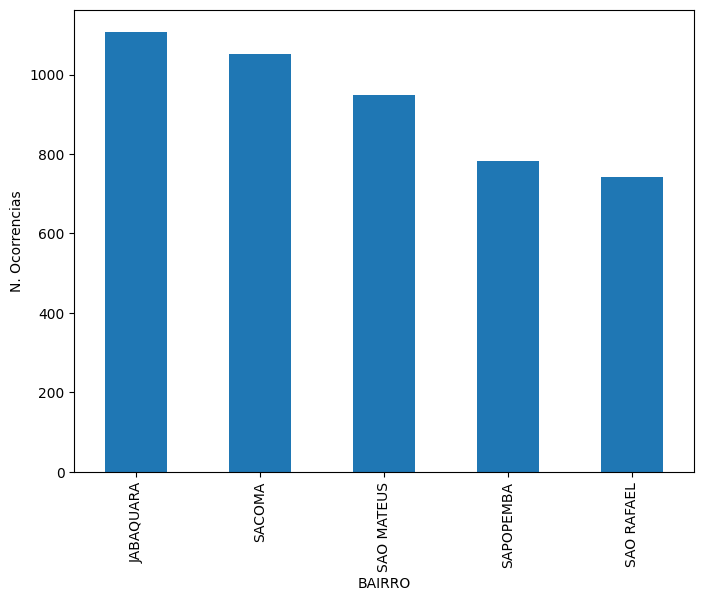

In [ ]:
LISTA_BAIRROS = ['JABAQUARA','SACOMA','SAO MATEUS','SAPOPEMBA','SAO RAFAEL','IGUATEMI','ITAQUERA','IPIRANGA','CIDADE ADEMAR','ITAIM PAULISTA']


filtro = (df_roubos.ANO_BO == 2020)
filtro2 = (df_roubos.BAIRRO.isin(['JABAQUARA','SACOMA','SAO MATEUS','SAPOPEMBA','SAO RAFAEL']))
dfsacoma = df_roubos.loc[filtro & filtro2]

dfsacoma.groupby(['BAIRRO'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(8,6),xlabel='BAIRRO',ylabel='N. Ocorrencias')

<Axes: xlabel='DESCR_TIPO_VEICULO'>

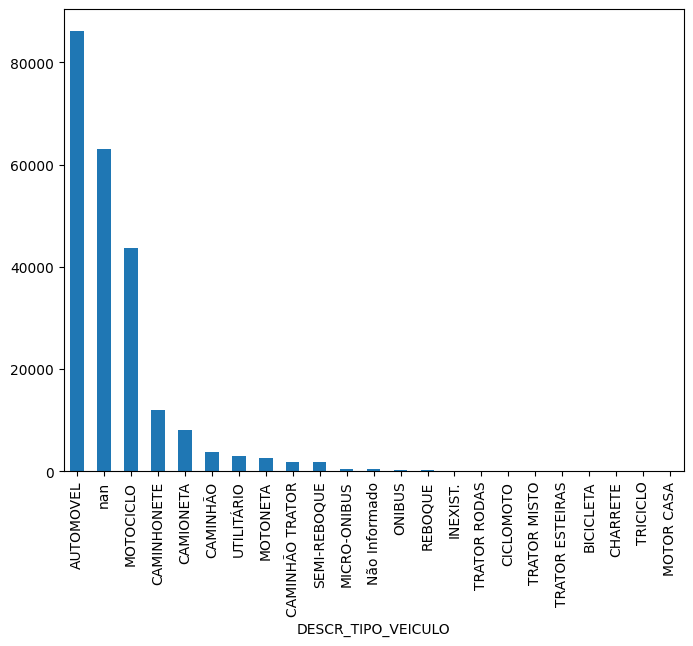

In [ ]:
df_roubos.groupby('DESCR_TIPO_VEICULO',dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(8,6))

# Tratamento Furtos

In [ ]:
df_furtos.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE',
       'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'TIPOPESSOA', 'VITIMAFATAL', 'NATURALIDADE',
       'NACIONALIDADE', 'SEXO', 'DATANASCIMENTO', 'IDADE', 'ESTADOCIVIL',
       'PROFISSAO', 'GRAUINSTRUCAO', 'CORCUTIS', 'NATUREZAVINCULADA',
       'TIPOVINCULO', 'RELACIONAMENTO', 'PARENTESCO', 'PLACA_VEICULO',
       'UF_VEICULO', 'CIDADE_VEICULO', 'DESCR_COR_VEICULO',
       'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO', 'ANO_MODELO',
       'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

In [ ]:
df_furtos.drop(['NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO', 'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'NUMERO_BOLETIM_PRINCIPAL', 'EXAME', 'SOLUCAO', 'PLACA_VEICULO', 'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA', 'DESDOBRAMENTO', 'TIPOPESSOA', 'VITIMAFATAL', 'NATURALIDADE', 'NACIONALIDADE', 'SEXO','IDADE','DATANASCIMENTO','ESTADOCIVIL','PROFISSAO','GRAUINSTRUCAO','CORCUTIS','NATUREZAVINCULADA','TIPOVINCULO','RELACIONAMENTO','PARENTESCO','PLACA_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],axis=1,inplace=True)

In [ ]:
df_furtos.columns

Index(['ANO_BO', 'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'FLAGRANTE', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE', 'UF',
       'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'STATUS', 'UF_VEICULO',
       'CIDADE_VEICULO', 'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO',
       'ANO_FABRICACAO', 'ANO_MODELO', 'DESCR_TIPO_VEICULO'],
      dtype='object')

In [ ]:
df_furtos.shape

(233660, 21)

In [ ]:
for data in df_furtos['DATAOCORRENCIA']:
    try:
        pd.to_datetime(data, format='%d/%m/%Y')
    except Exception as e:
        print(f"Erro ao converter {data}: {e}")

Erro ao converter 27/01/0222: Out of bounds nanosecond timestamp: 222-01-27 00:00:00
Erro ao converter 13/05/1202: Out of bounds nanosecond timestamp: 1202-05-13 00:00:00
Erro ao converter 26/01/1202: Out of bounds nanosecond timestamp: 1202-01-26 00:00:00
Erro ao converter 11/07/0202: Out of bounds nanosecond timestamp: 202-07-11 00:00:00
Erro ao converter 09/12/1021: Out of bounds nanosecond timestamp: 1021-12-09 00:00:00
Erro ao converter 10/06/1202: Out of bounds nanosecond timestamp: 1202-06-10 00:00:00
Erro ao converter 10/11/1202: Out of bounds nanosecond timestamp: 1202-11-10 00:00:00
Erro ao converter 28/12/1018: Out of bounds nanosecond timestamp: 1018-12-28 00:00:00
Erro ao converter 03/02/1019: Out of bounds nanosecond timestamp: 1019-02-03 00:00:00
Erro ao converter 08/02/1019: Out of bounds nanosecond timestamp: 1019-02-08 00:00:00
Erro ao converter 26/04/1019: Out of bounds nanosecond timestamp: 1019-04-26 00:00:00
Erro ao converter 16/06/1019: Out of bounds nanosecond t

In [ ]:
df_furtos.DATAOCORRENCIA.replace(to_replace ="27/01/0222",value = '27/01/2022', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="13/05/1202",value = '13/05/2022', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="26/01/1202",value = '26/01/2021', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="11/07/0202",value = '11/07/2021', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="09/12/1021",value = '09/12/2021', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="10/06/1202",value = '10/06/2020', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="14/06/1202",value = '14/06/2020', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="24/11/0202",value = '24/11/2020', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="10/11/1202",value = '10/11/2020', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="28/12/1018",value = '28/12/2019', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="03/02/1019",value = '03/02/2019', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="08/02/1019",value = '08/02/2019', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="26/04/1019",value = '26/04/2019', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="16/06/1019",value = '16/06/2019', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ="30/08/0219",value = '30/08/2019', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ='01/10/1019',value = '01/10/2019', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ='08/07/1018',value = '08/07/2018', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ='04/08/1018',value = '04/08/2018', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ='02/01/0201',value = '02/10/2018', regex=True,inplace=True)
df_furtos.DATAOCORRENCIA.replace(to_replace ='17/11/1018',value = '17/11/2018', regex=True,inplace=True)

In [ ]:
df_furtos['DATAOCORRENCIA'] = pd.to_datetime(df_furtos['DATAOCORRENCIA'], format='%d/%m/%Y')

In [ ]:
for data in df_furtos['HORAOCORRENCIA']:
    try:
        pd.to_datetime(data, format='%H:%M')
    except Exception as e:
        print(f"Erro ao converter {data}: {e}")

In [ ]:
df_furtos['HORAOCORRENCIA']= pd.to_datetime(df_furtos['HORAOCORRENCIA'],format='%H:%M')

In [ ]:
df_furtos['NUMERO'] = df_furtos['NUMERO'].astype(str)
df_furtos['ANO_FABRICACAO']=df_furtos.ANO_FABRICACAO.round().astype('Int64')
df_furtos['ANO_MODELO']=df_furtos.ANO_MODELO.round().astype('Int64')

In [ ]:
df_furtos.dtypes

ANO_BO                          int64
DATAOCORRENCIA         datetime64[ns]
HORAOCORRENCIA         datetime64[ns]
PERIDOOCORRENCIA               object
FLAGRANTE                      object
LOGRADOURO                     object
NUMERO                         object
BAIRRO                         object
CIDADE                         object
UF                             object
LATITUDE                       object
LONGITUDE                      object
DESCRICAOLOCAL                 object
STATUS                         object
UF_VEICULO                     object
CIDADE_VEICULO                 object
DESCR_COR_VEICULO              object
DESCR_MARCA_VEICULO            object
ANO_FABRICACAO                  Int64
ANO_MODELO                      Int64
DESCR_TIPO_VEICULO             object
dtype: object

In [ ]:
df_furtos.shape

(233660, 21)

In [ ]:
df_furtos.isna().sum()

ANO_BO                      0
DATAOCORRENCIA              0
HORAOCORRENCIA          35493
PERIDOOCORRENCIA            0
FLAGRANTE                   0
LOGRADOURO              11694
NUMERO                      0
BAIRRO                   2283
CIDADE                     16
UF                         16
LATITUDE                24489
LONGITUDE               24489
DESCRICAOLOCAL              0
STATUS                      0
UF_VEICULO              30981
CIDADE_VEICULO          31074
DESCR_COR_VEICULO       30927
DESCR_MARCA_VEICULO     35921
ANO_FABRICACAO           7530
ANO_MODELO             103315
DESCR_TIPO_VEICULO      31208
dtype: int64

Dropamos a coluna ANO_MODELO pois tem mais de 40% de valores nulos

In [ ]:
df_furtos.drop(['ANO_MODELO'],axis=1,inplace=True)

## Visualizações e Insights Furtos

In [ ]:
df_furtos.groupby(['BAIRRO']).size().sort_values(ascending=False).head(10)

BAIRRO
SAO MATEUS       6529
SAPOPEMBA        6091
TATUAPE          5606
SAO LUCAS        4942
IPIRANGA         4820
ITAQUERA         4724
VILA MARIANA     4559
VILA PRUDENTE    4493
AGUA RASA        4303
VILA FORMOSA     4169
dtype: int64

<Axes: xlabel='ANO_BO', ylabel='N. Ocorrencias'>

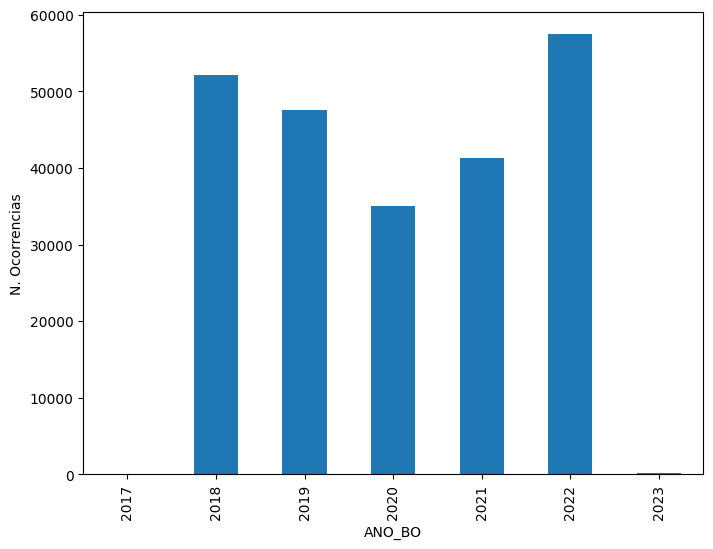

In [ ]:
df_furtos.groupby(['ANO_BO']).size().plot.bar(figsize=(8,6),xlabel='ANO_BO',ylabel='N. Ocorrencias')

<Axes: >

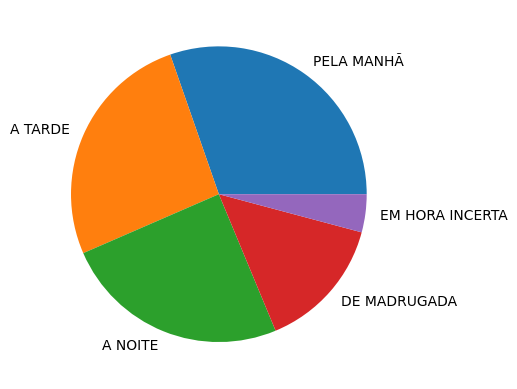

In [ ]:
df_furtos.groupby('PERIDOOCORRENCIA',dropna=False).size().sort_values(ascending=False).plot.pie()

In [ ]:
df_furtos.groupby(['DESCR_COR_VEICULO']).size().sort_values(ascending=False)

DESCR_COR_VEICULO
Preta            44558
Prata            42633
Branco           39946
Vermelho         26929
Cinza            24429
Azul             12798
Verde             5609
Bege              1776
Amarelo           1359
Marrom            1170
Laranja            704
Roxa               329
Dourada            243
Fantasia           154
Rosa                49
Grena               45
Não Informado        2
dtype: int64

<Axes: >

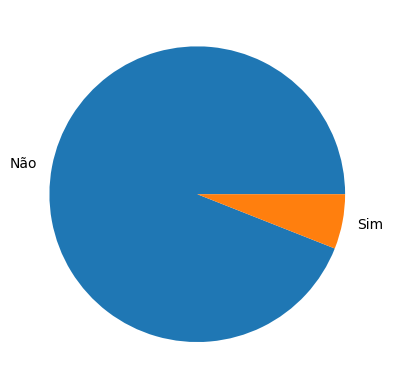

In [ ]:
df_furtos.groupby('FLAGRANTE',dropna=False).size().sort_values(ascending=False).plot.pie()

In [ ]:
df_furtos.DESCRICAOLOCAL.replace(to_replace ="Via Pública",value = 'Via pública', regex=True,inplace=True)


In [ ]:
df_furtos.groupby(['DESCRICAOLOCAL']).size().sort_values(ascending=False)

DESCRICAOLOCAL
Via pública                        198237
Outros                              12373
Residência                           6643
Comércio e serviços                  5295
Estacionamento público               3592
Garagem ou abrigo de residência      1860
Estacionamento particular            1156
Estacionamento com vigilância         794
Condominio Residencial                539
Garagem coletiva de prédio            535
Centro Comerc./Empresarial            507
Repartição Pública                    401
Area não ocupada                      290
Lazer e recreação                     221
Shopping Center                       145
Condominio Comercial                  138
Escritório                            137
Restaurante e afins                   107
Estabelecimento de ensino              87
Saúde                                  87
Rodovia/Estrada                        75
Terminal/Estação                       66
Local clandestino/ilegal               64
Templo e afins     

<Axes: >

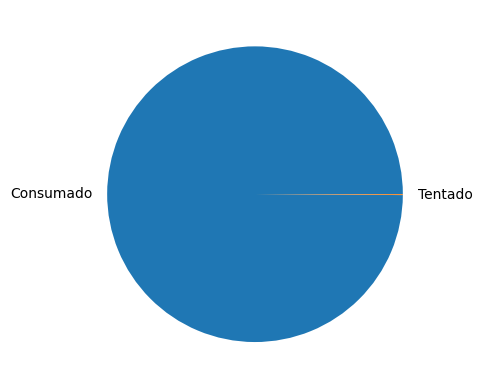

In [ ]:
df_furtos.groupby('STATUS',dropna=False).size().sort_values(ascending=False).plot.pie()

In [ ]:
df_furtos.groupby(['UF_VEICULO']).size().sort_values(ascending=False)

UF_VEICULO
SP    190112
MG      8824
PR      1055
RJ       455
SC       368
BA       345
GO       264
PB       145
PE       136
RS       120
CE       116
MS       108
DF       104
ES        94
PI        63
MT        55
RN        49
AL        49
PA        44
MA        39
SE        33
AM        27
TO        26
OP        22
RO        12
AC         7
RR         4
EX         2
AP         1
dtype: int64

In [ ]:
df_furtos.groupby(['DESCR_MARCA_VEICULO']).size().sort_values(ascending=False)

DESCR_MARCA_VEICULO
HONDA/CG 160 FAN            4044
HONDA/PCX 150               3556
GM/CORSA WIND               3393
HYUNDAI/HB20 1.0M COMFOR    3264
CHEVROLET/ONIX 1.0MT LT     2506
                            ... 
I/SHINERAY MVK XY150 1         1
I/SHINERAY MVK XY125 1         1
I/SEAT POLO 16V 1.0L           1
I/SEAT CORDOBA                 1
YAMAHA/YZF R3 WGP 60TH         1
Length: 5301, dtype: int64

Arrumandos as marcas e modelos dos veículos para Furtos.

In [ ]:
df_furtos['modelo'] = df_furtos['DESCR_MARCA_VEICULO'].str.split(' ', n=2, expand=True)[0] + ' ' + df_furtos['DESCR_MARCA_VEICULO'].str.split(' ', n=2, expand=True)[1]
#linha para evitar que valores que não tem ' ' sejam anuladas na nova coluna

df_furtos['modelo'].head(5)

0    FIAT/UNO ELETRONIC
1                   NaN
2         GM/CORSA WIND
3                   NaN
4         GM/CORSA WIND
Name: modelo, dtype: object

In [ ]:
df_furtos['modelo'] = np.where(df_furtos['modelo'].str.startswith('I/'),
                               df_furtos['modelo'],
                               df_furtos['modelo'].str.split(' ', n=2, expand=True)[0])
df_furtos['modelo'] = df_furtos['modelo'].fillna(df_furtos['DESCR_MARCA_VEICULO'])

df_furtos['modelo'].head(5)


0    FIAT/UNO
1         NaN
2    GM/CORSA
3         NaN
4    GM/CORSA
Name: modelo, dtype: object

In [ ]:
df_furtos.groupby(['modelo']).size().sort_values(ascending=False).head(20)

modelo
HONDA/CG           14399
FIAT/UNO            9820
VW/GOL              9395
CHEVROLET/ONIX      7360
FIAT/PALIO          7059
GM/CORSA            6728
HYUNDAI/HB20        6142
FORD/KA             5412
VW/NOVO             4753
HONDA/PCX           4280
FORD/FIESTA         3908
VW/FOX              3378
FIAT/MOBI           3044
HONDA/XRE           2834
VW/VOYAGE           2582
RENAULT/SANDERO     2549
FIAT/SIENA          2428
CHEV/PRISMA         2215
HONDA/CB            1854
I/HYUNDAI I30       1795
dtype: int64

In [ ]:
top_20 = df_furtos.groupby(['modelo']).size().sort_values(ascending=False).head(20)
lista_top_20 = top_20.index.tolist()
lista_top_20

['HONDA/CG',
 'FIAT/UNO',
 'VW/GOL',
 'CHEVROLET/ONIX',
 'FIAT/PALIO',
 'GM/CORSA',
 'HYUNDAI/HB20',
 'FORD/KA',
 'VW/NOVO',
 'HONDA/PCX',
 'FORD/FIESTA',
 'VW/FOX',
 'FIAT/MOBI',
 'HONDA/XRE',
 'VW/VOYAGE',
 'RENAULT/SANDERO',
 'FIAT/SIENA',
 'CHEV/PRISMA',
 'HONDA/CB',
 'I/HYUNDAI I30']

In [ ]:
for valor in lista_top_20:
    filtrointerno = df_furtos.modelo.fillna('').str.contains(valor)
    df_furtos.loc[filtrointerno, 'modelo'] = df_furtos.loc[filtrointerno, 'modelo'].str.replace(rf'{valor}.*', valor)

<ipython-input-213-bef63808debc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_furtos.loc[filtrointerno, 'modelo'] = df_furtos.loc[filtrointerno, 'modelo'].str.replace(rf'{valor}.*', valor)


In [ ]:
df_furtos.groupby(['modelo']).size().sort_values(ascending=False).head(20)

modelo
HONDA/CG           15906
FIAT/UNO            9820
VW/GOL              9528
HYUNDAI/HB20        8155
CHEVROLET/ONIX      7360
FIAT/PALIO          7059
GM/CORSA            6728
FORD/KA             5412
VW/NOVO             4753
HONDA/PCX           4280
FORD/FIESTA         3908
HONDA/CB            3510
VW/FOX              3378
FIAT/MOBI           3044
HONDA/XRE           2834
VW/VOYAGE           2582
RENAULT/SANDERO     2549
FIAT/SIENA          2428
CHEV/PRISMA         2215
I/HYUNDAI I30       1795
dtype: int64

In [ ]:
# Consultas pra ver inconsistências restantes
filtrointerno = df_furtos.modelo.fillna('').str.contains('CB')#& df_furtos.modelo.fillna('').str.contains('HYUNDAI')
df_furtos.loc[filtrointerno].groupby(['modelo']).size().sort_values(ascending=False)

modelo
HONDA/CB              3510
I/HONDA CBR             44
I/HONDA CB              24
I/HONDA CB250            9
I/HONDA CB750F           3
I/HONDA CB350            2
I/HONDA CB500            2
I/HONDA CB600F           2
I/HONDA CBX              2
MR/JCB                   2
I/HONDA CB550            1
SCANIA/P124CB6X4NZ       1
dtype: int64

In [ ]:
#Corrigindo inconsistência do GOL
df_furtos.modelo.replace(to_replace ="I/VW GOL",value = 'VW/GOL', regex=True,inplace=True)

In [ ]:
#HB20
df_furtos.modelo.replace(to_replace ="I/HYUNDAI HB20",value = 'HYUNDAI/HB20', regex=True,inplace=True)
df_furtos.modelo.replace(to_replace ="HYUNDAY/HB2010TM",value = 'HYUNDAI/HB20', regex=True,inplace=True)

In [ ]:
#ONIX
df_furtos.modelo.replace(to_replace ="CHEV/ONIX",value = 'CHEVROLET/ONIX', regex=True,inplace=True)

In [ ]:
#PALIO
df_furtos.modelo.replace(to_replace ="I/FIAT PALIO",value = 'FIAT/PALIO', regex=True,inplace=True)

In [ ]:
#CORSA
df_furtos.modelo.replace(to_replace ="I/GM CORSA",value = 'GM/CORSA', regex=True,inplace=True)

In [ ]:
#NOVO
df_furtos.modelo.replace(to_replace ="I/VW NOVO",value = 'VW/NOVO', regex=True,inplace=True)

In [ ]:
#FIESTA
df_furtos.modelo.replace(to_replace ="I/FORD FIESTA",value = 'FORD/FIESTA', regex=True,inplace=True)

In [ ]:
#HONDA CB
lista_modelos = df_furtos.loc[filtrointerno].groupby(['modelo']).size().sort_values(ascending=False).index.tolist()
lista_modelos.remove('I/HONDA CBR')
lista_modelos.remove('I/HONDA CBX')

for veiculo in lista_modelos:
  df_furtos.modelo.replace(to_replace =veiculo,value = 'HONDA/CB', regex=True,inplace=True)
# lista_modelos

In [ ]:
lista_modelos = df_furtos.loc[filtrointerno].groupby(['modelo']).size().sort_values(ascending=False).index.tolist()
lista_modelos.remove('HONDA/CBR')
lista_modelos.remove('HONDA/CBX')
for veiculo in lista_modelos:
  df_furtos.modelo.replace(to_replace =veiculo,value = 'HONDA/CB', regex=True,inplace=True)

In [ ]:
#FOX
df_furtos.modelo.replace(to_replace ="I/VW FOX",value = 'VW/FOX', regex=True,inplace=True)

In [ ]:
#SIENA
df_furtos.modelo.replace(to_replace ="I/FIAT SIENA",value = 'FIAT/SIENA', regex=True,inplace=True)

In [ ]:
#SANDERO
df_furtos.modelo.replace(to_replace ="I/RENAULT SANDERO",value = 'RENAULT/SANDERO', regex=True,inplace=True)

In [ ]:
#PRISMA
df_furtos.modelo.replace(to_replace ="CHEV/PRISMA",value = 'CHEVROLET/PRISMA', regex=True,inplace=True)
df_furtos.modelo.replace(to_replace ="GM/PRISMA",value = 'CHEVROLET/PRISMA', regex=True,inplace=True)

<Axes: xlabel='DESCR_TIPO_VEICULO'>

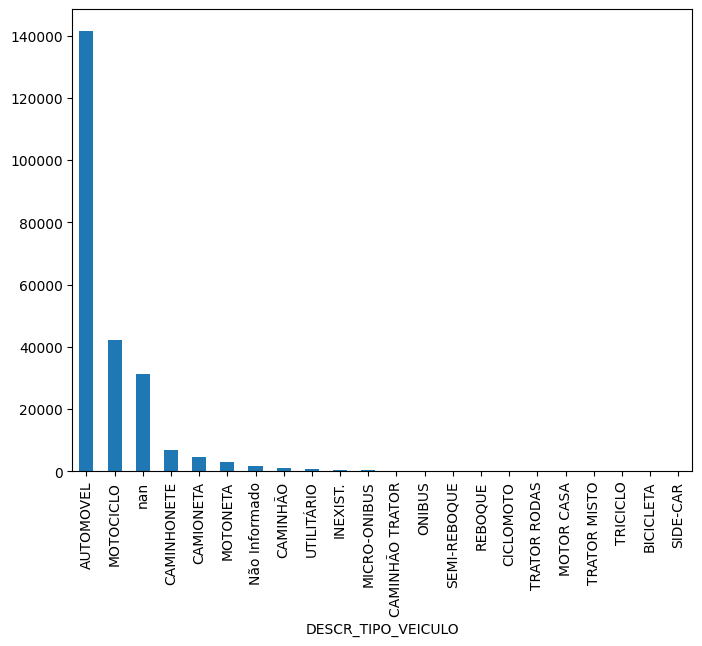

In [ ]:
df_furtos.groupby('DESCR_TIPO_VEICULO',dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(8,6))

In [ ]:
df_furtos.columns

Index(['ANO_BO', 'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'FLAGRANTE', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE', 'UF',
       'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'STATUS', 'UF_VEICULO',
       'CIDADE_VEICULO', 'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO',
       'ANO_FABRICACAO', 'DESCR_TIPO_VEICULO', 'modelo'],
      dtype='object')

In [ ]:
df_roubos.rename(columns={'ANO_BO': 'ANO', 'DATAOCORRENCIA': 'DATA DA OCORRÊNCIA',
                          'PERIDOOCORRENCIA': 'PERÍODO DO DIA','NUMERO': 'NÚMERO',
                          'DESCRICAOLOCAL':'DESCRIÇÃO DO LOCAL','UF_VEICULO':'UF DO VEÍCULO',
                          'CIDADE_VEICULO':'CIDADE DO VEÍCULO','DESCR_COR_VEICULO':'COR DO VEÍCULO',
                          'DESCR_MARCA_VEICULO':'VERSÃO DO VEÍCULO','ANO_FABRICACAO':'FABRICAÇÃO',
                          'DESCR_TIPO_VEICULO':'TIPO DE VEÍCULO','modelo':'MODELO DO VEÍCULO'}, inplace=True)
df_furtos.rename(columns={'ANO_BO': 'ANO', 'DATAOCORRENCIA': 'DATA DA OCORRÊNCIA',
                          'PERIDOOCORRENCIA': 'PERÍODO DO DIA','NUMERO': 'NÚMERO',
                          'DESCRICAOLOCAL':'DESCRIÇÃO DO LOCAL','UF_VEICULO':'UF DO VEÍCULO',
                          'CIDADE_VEICULO':'CIDADE DO VEÍCULO','DESCR_COR_VEICULO':'COR DO VEÍCULO',
                          'DESCR_MARCA_VEICULO':'VERSÃO DO VEÍCULO','ANO_FABRICACAO':'FABRICAÇÃO',
                          'DESCR_TIPO_VEICULO':'TIPO DE VEÍCULO','modelo':'MODELO DO VEÍCULO'}, inplace=True)


In [ ]:
df_furtos.columns

Index(['ANO', 'DATA DA OCORRÊNCIA', 'HORAOCORRENCIA', 'PERÍODO DO DIA',
       'FLAGRANTE', 'LOGRADOURO', 'NÚMERO', 'BAIRRO', 'CIDADE', 'UF',
       'LATITUDE', 'LONGITUDE', 'DESCRIÇÃO DO LOCAL', 'STATUS',
       'UF DO VEÍCULO', 'CIDADE DO VEÍCULO', 'COR DO VEÍCULO',
       'VERSÃO DO VEÍCULO', 'FABRICAÇÃO', 'TIPO DE VEÍCULO',
       'MODELO DO VEÍCULO'],
      dtype='object')

In [ ]:
df_furtos.isna().sum()*100/df_furtos.shape[0]

ANO                    0.000000
DATA DA OCORRÊNCIA     0.000000
HORAOCORRENCIA        15.190020
PERÍODO DO DIA         0.000000
FLAGRANTE              0.000000
LOGRADOURO             5.004708
NÚMERO                 0.000000
BAIRRO                 0.977061
CIDADE                 0.006848
UF                     0.006848
LATITUDE              10.480613
LONGITUDE             10.480613
DESCRIÇÃO DO LOCAL     0.000000
STATUS                 0.000000
UF DO VEÍCULO         13.259009
CIDADE DO VEÍCULO     13.298810
COR DO VEÍCULO        13.235898
VERSÃO DO VEÍCULO     15.373192
FABRICAÇÃO             3.222631
TIPO DE VEÍCULO       13.356159
MODELO DO VEÍCULO     15.373192
dtype: float64

In [ ]:
df_roubos.isna().sum()*100/df_roubos.shape[0]

ANO                    0.000000
DATA DA OCORRÊNCIA     0.000000
HORAOCORRENCIA         2.567528
PERÍODO DO DIA         0.000000
FLAGRANTE              0.000000
LOGRADOURO             4.479442
NÚMERO                 0.000000
BAIRRO                 0.710102
CIDADE                 0.039987
UF                     0.039987
LATITUDE               6.843958
LONGITUDE              6.843958
DESCRIÇÃO DO LOCAL     0.000000
STATUS                 0.000000
UF DO VEÍCULO         29.254349
CIDADE DO VEÍCULO     29.703875
COR DO VEÍCULO        27.690016
VERSÃO DO VEÍCULO     29.738589
FABRICAÇÃO             3.353649
ANO_MODELO            14.622121
TIPO DE VEÍCULO       27.733958
MODELO DO VEÍCULO     29.738589
dtype: float64

In [ ]:
filtro = df_roubos['MODELO DO VEÍCULO'].isnull()
df = df_roubos[filtro]
df =df[['VERSÃO DO VEÍCULO','MODELO DO VEÍCULO' ]]
filtro2 = df_roubos['VERSÃO DO VEÍCULO'].notnull()
df[filtro2]

<ipython-input-235-bd0ff44c40c7>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[filtro2]


,VERSÃO DO VEÍCULO,MODELO DO VEÍCULO


In [ ]:
df_roubos.duplicated().sum()

97074

In [ ]:
df_roubos = df_roubos.drop_duplicates()

In [ ]:
df_roubos.duplicated().sum()

0

In [ ]:
df_furtos.duplicated().sum()

38002

In [ ]:
df_furtos = df_furtos.drop_duplicates()

In [ ]:
df_furtos.duplicated().sum()

0

#Exportandos os arquivos CSV

In [ ]:
df_furtos.to_csv('furtos_tratados.csv', index=False)

In [ ]:
df_roubos.to_csv('roubos_tratados.csv', index=False)


#MongoDB

In [ ]:
pip install pymongo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 33.6 MB/s eta 0:00:00


In [ ]:
import pymongo
from pymongo import MongoClient

uri = "mongodb+srv://tomaz03.0fildnq.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client_mongo = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-3463438694104533343.pem')

db = client_mongo['Tratados']
colecao = db['roubos']

In [ ]:
df_furtos.isna().sum()/df_furtos.shape[0]

ANO                   0.000000
DATA DA OCORRÊNCIA    0.000000
HORAOCORRENCIA        0.159411
PERÍODO DO DIA        0.000000
FLAGRANTE             0.000000
LOGRADOURO            0.041639
NÚMERO                0.000000
BAIRRO                0.011121
CIDADE                0.000020
UF                    0.000020
LATITUDE              0.103395
LONGITUDE             0.103395
DESCRIÇÃO DO LOCAL    0.000000
STATUS                0.000000
UF DO VEÍCULO         0.083513
CIDADE DO VEÍCULO     0.083973
COR DO VEÍCULO        0.083283
VERSÃO DO VEÍCULO     0.107785
FABRICAÇÃO            0.036768
TIPO DE VEÍCULO       0.084556
MODELO DO VEÍCULO     0.107785
dtype: float64

In [ ]:
df_furtos = df_furtos.astype(object).where(df_furtos['HORAOCORRENCIA'].notnull(), None)

In [ ]:
df_furtos.fillna('', inplace=True)

In [ ]:
df_furtos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195658 entries, 0 to 233659
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ANO                 195658 non-null  object
 1   DATA DA OCORRÊNCIA  195658 non-null  object
 2   HORAOCORRENCIA      195658 non-null  object
 3   PERÍODO DO DIA      195658 non-null  object
 4   FLAGRANTE           195658 non-null  object
 5   LOGRADOURO          195658 non-null  object
 6   NÚMERO              195658 non-null  object
 7   BAIRRO              195658 non-null  object
 8   CIDADE              195658 non-null  object
 9   UF                  195658 non-null  object
 10  LATITUDE            195658 non-null  object
 11  LONGITUDE           195658 non-null  object
 12  DESCRIÇÃO DO LOCAL  195658 non-null  object
 13  STATUS              195658 non-null  object
 14  UF DO VEÍCULO       195658 non-null  object
 15  CIDADE DO VEÍCULO   195658 non-null  object
 16  CO

In [ ]:
df_roubos = df_roubos.astype(object).where(df_roubos['HORAOCORRENCIA'].notnull(), None)
df_roubos.fillna('', inplace=True)
colecao.insert_many(df_roubos.to_dict("records"))

In [ ]:
#import time
colecao2 = db['furtos']

colecao2.insert_many(df_furtos.to_dict("records"))


# while True:
#     try:
#         colecao2.insert_many(df_furtos.to_dict("records"))
#         break
#     except Exception as e:
#         print("Erro ao inserir no MongoDB. Tentando novamente em 5 segundos.")
#         print(e)
#         time.sleep(5)

AutoReconnect: ignored

In [ ]:
df_roubos.shape[0]

130499

In [ ]:
#Roubos
colecao.count_documents({})

130499

In [ ]:
#furtos
colecao2.count_documents({})

86285

In [ ]:
df_furtos.shape[0]

195658